In [66]:
import pandas as pd
import numpy as np
import plotly 
import cufflinks as cf
import wbpy
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plotly.tools.set_credentials_file(username='richongo', api_key='knfESm6zSffWin5ujtln')
import matplotlib.pyplot as plt
import scipy.stats as stats

In [67]:
#Import Aid data
file1 = "Economic_vs_Military.xlsx"
Aid_df = pd.read_excel(file1)
file2= "InfantMorality.csv"
Aid_df = Aid_df.rename(columns={"Row Labels": "Country"})
InfantMortality_df = pd.read_csv(file2)

InfantMortality_df.head()


,Unnamed: 0,Year,Angola,Burundi,Benin,Ethiopia,Ghana,Kenya,Madagascar,Mali,Mozambique,Namibia,Nigeria,Rwanda,Senegal,Sierra Leone,Somalia,Uganda,South Africa,Zimbabwe
0,0,2002,95971.0,24984.0,25051.0,236821.0,41281.0,75705.0,40879.0,59444.0,85134.0,2804.0,568287.0,29228.0,25026.0,29723.0,46562.0,98596.0,59495.0,23990.0
1,1,2003,95253.0,24759.0,24920.0,227584.0,40940.0,73661.0,39524.0,58812.0,82977.0,2780.0,564928.0,27352.0,24344.0,29885.0,47551.0,96119.0,59666.0,24394.0
2,2,2004,93986.0,24537.0,24813.0,217766.0,40789.0,71278.0,38252.0,58033.0,80906.0,2724.0,560267.0,25200.0,23665.0,29984.0,48604.0,93242.0,59263.0,25221.0
3,3,2005,92430.0,24267.0,24755.0,207679.0,40758.0,68408.0,37048.0,57135.0,78926.0,2559.0,554716.0,23209.0,23032.0,29984.0,49701.0,90154.0,58548.0,26068.0
4,4,2006,90346.0,23937.0,24793.0,198004.0,40772.0,65861.0,35925.0,56376.0,76947.0,2461.0,548359.0,21394.0,22467.0,29798.0,50689.0,87169.0,57132.0,27209.0


In [68]:
api = wbpy.IndicatorAPI()

iso_country_codes = ["KEN", "ZAF", "NGA", "ZWE", "ETH", "UGA",
                     "GHA", "SEN", "MDG", "MOZ", "NAM", "BDI",
                    "BEN", "SOM", "MLI", "AGO", "SLE", "RWA"]

infant_mortality = "SH.DTH.IMRT"

dataset_IMRT = api.get_dataset(infant_mortality, iso_country_codes, date="2002:2017")
dataset_IMRT

<wbpy.indicators.IndicatorDataset('SH.DTH.IMRT', 'Number of infant deaths') with id: 1771989107544>

In [69]:
d=dataset_IMRT.as_dict() 
infant_mortality_df=pd.DataFrame(data=d)
infant_mortality_df
infant_mortality_df = infant_mortality_df.rename(columns={"AO":"Angola", "BI": "Burundi", "BJ": "Benin", "ET":"Ethiopia", "GH": "Ghana", "KE":"Kenya", "MG": "Madagascar", "ML":"Mali", "MZ":"Mozambique",  "NA": "Namibia", "NG":"Nigeria", "RW":"Rwanda", "SN": "Senegal", "SL":"Sierra Leone", "SO": "Somalia", "UG":"Uganda", "ZA":"South Africa", "ZW":"Zimbabwe"})
infant_mortality_df = infant_mortality_df.reset_index()
infant_mortality_df = infant_mortality_df.rename(columns={"index":"Year"})
infant_mortality_df.head

<bound method NDFrame.head of     Year   Angola  Burundi    Benin  Ethiopia    Ghana    Kenya  Madagascar  \
0   2002  95971.0  24984.0  25051.0  236821.0  41281.0  75705.0     40879.0   
1   2003  95253.0  24759.0  24920.0  227584.0  40940.0  73661.0     39524.0   
2   2004  93986.0  24537.0  24813.0  217766.0  40789.0  71278.0     38252.0   
3   2005  92430.0  24267.0  24755.0  207679.0  40758.0  68408.0     37048.0   
4   2006  90346.0  23937.0  24793.0  198004.0  40772.0  65861.0     35925.0   
5   2007  87956.0  23534.0  24901.0  189064.0  40712.0  63637.0     34801.0   
6   2008  85249.0  23068.0  25086.0  180863.0  40498.0  60970.0     33681.0   
7   2009  82217.0  22576.0  25313.0  173475.0  40037.0  59177.0     32601.0   
8   2010  79220.0  22090.0  25560.0  166949.0  39274.0  57429.0     31536.0   
9   2011  76226.0  21596.0  25785.0  161040.0  38342.0  56255.0     30498.0   
10  2012  73448.0  21071.0  25948.0  155642.0  37260.0  55733.0     29580.0   
11  2013  70939.0  205

In [70]:
Infant_Mortality = InfantMortality_df.drop(columns=["Unnamed: 0"])
Infant_Mortality.head()

,Year,Angola,Burundi,Benin,Ethiopia,Ghana,Kenya,Madagascar,Mali,Mozambique,Namibia,Nigeria,Rwanda,Senegal,Sierra Leone,Somalia,Uganda,South Africa,Zimbabwe
0,2002,95971.0,24984.0,25051.0,236821.0,41281.0,75705.0,40879.0,59444.0,85134.0,2804.0,568287.0,29228.0,25026.0,29723.0,46562.0,98596.0,59495.0,23990.0
1,2003,95253.0,24759.0,24920.0,227584.0,40940.0,73661.0,39524.0,58812.0,82977.0,2780.0,564928.0,27352.0,24344.0,29885.0,47551.0,96119.0,59666.0,24394.0
2,2004,93986.0,24537.0,24813.0,217766.0,40789.0,71278.0,38252.0,58033.0,80906.0,2724.0,560267.0,25200.0,23665.0,29984.0,48604.0,93242.0,59263.0,25221.0
3,2005,92430.0,24267.0,24755.0,207679.0,40758.0,68408.0,37048.0,57135.0,78926.0,2559.0,554716.0,23209.0,23032.0,29984.0,49701.0,90154.0,58548.0,26068.0
4,2006,90346.0,23937.0,24793.0,198004.0,40772.0,65861.0,35925.0,56376.0,76947.0,2461.0,548359.0,21394.0,22467.0,29798.0,50689.0,87169.0,57132.0,27209.0


In [71]:
InfantMortality_melt=Infant_Mortality.melt(id_vars=["Year"],
                                              var_name="Country",
                                              value_name="Infant Mortality")
InfantMortality_melt.head(10)

,Year,Country,Infant Mortality
0,2002,Angola,95971.0
1,2003,Angola,95253.0
2,2004,Angola,93986.0
3,2005,Angola,92430.0
4,2006,Angola,90346.0
5,2007,Angola,87956.0
6,2008,Angola,85249.0
7,2009,Angola,82217.0
8,2010,Angola,79220.0
9,2011,Angola,76226.0


In [72]:
combined_data=pd.merge(Aid_df, InfantMortality_melt, on=["Country", "Year"])
combined_data.head()

,Country,Year,Economic,Military,Grand Total,Infant Mortality
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,95971.0
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,95253.0
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,93986.0
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,92430.0
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,90346.0


In [73]:
CombinedAid_InfantMortality= combined_data.rename(index=str, columns={"Grand Total": "Total Aid"})


In [74]:
# Group by country and shift two years ahead to see whether there is any impact. 
CombinedAid_InfantMortality_EM2=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_EM2[['Economic_2', 'Military_2']] = CombinedAid_InfantMortality.groupby(['Country'])['Economic', 'Military'].shift(2)
CombinedAid_InfantMortality_EM2= CombinedAid_InfantMortality_EM2.dropna()

# Group by country; shift four years ahead to see effect
CombinedAid_InfantMortality_EM4=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_EM4[['Economic_4', 'Military_4']] = CombinedAid_InfantMortality.groupby(['Country'])['Economic', 'Military'].shift(4)
CombinedAid_InfantMortality_EM4= CombinedAid_InfantMortality_EM4.dropna()

# Repeat for 6-year impact
CombinedAid_InfantMortality_EM6=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_EM6[['Economic_6', 'Military_6']] = CombinedAid_InfantMortality.groupby(['Country'])['Economic', 'Military'].shift(6)
CombinedAid_InfantMortality_EM6= CombinedAid_InfantMortality_EM6.dropna()

CombinedAid_InfantMortality_EM6.head()
CombinedAid_InfantMortality["Country"].nunique()

18

In [54]:
# Group by country and shift two years ahead to see whether there is any impact. 
CombinedAid_InfantMortality_2=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_2[['Infant Mortality']] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(2)
CombinedAid_InfantMortality_2= CombinedAid_InfantMortality_EM2.dropna()

# Group by country; shift four years ahead to see effect
CombinedAid_InfantMortality_4=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_4[['Infant Mortality']] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(4)
CombinedAid_InfantMortality_EM4= CombinedAid_InfantMortality_EM4.dropna()

# Repeat for 6-year impact
CombinedAid_InfantMortality_6=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_6[['Infant Mortality']] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(6)
CombinedAid_InfantMortality_6= CombinedAid_InfantMortality_EM6.dropna()

CombinedAid_InfantMortality_EM6.head()


,Country,Year,Economic,Military,Total Aid,Infant Mortality,Economic_6,Military_6
6,Angola,2008,6.537215e+07,396706.828528,6.576886e+07,85249.0,1.659227e+08,0.000000
7,Angola,2009,6.095525e+07,535667.400000,6.149092e+07,82217.0,2.155944e+08,395057.529807
8,Angola,2010,1.114652e+08,417850.218081,1.118831e+08,79220.0,1.520490e+08,638258.217553
9,Angola,2011,8.945588e+07,458935.004372,8.991482e+07,76226.0,8.311513e+07,387385.061877
10,Angola,2012,7.950237e+07,468601.717393,7.997097e+07,73448.0,9.623060e+07,768343.338990


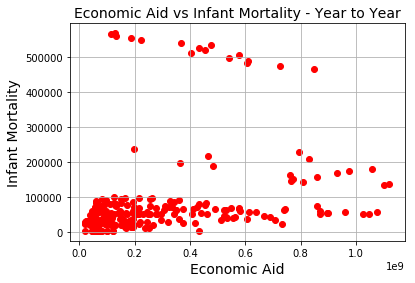

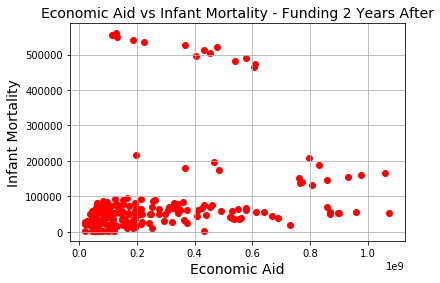

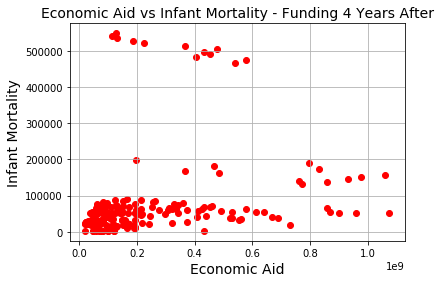

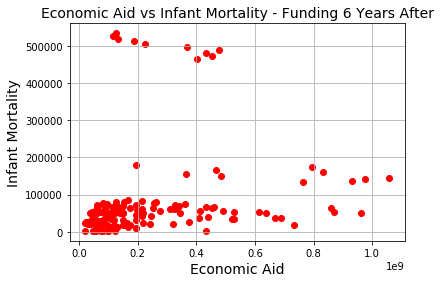

In [75]:
# #Use itertools to change color by country
# import itertools

# #Plot AIM (same year-data)
# x=CombinedAid_InfantMortality['Economic']
# ys = CombinedAid_InfantMortality['Infant Mortality']
# colors = itertools.cycle(["black", "red", "orange", "yellow", "green", "blue",
#                          "purple", "brown", "gray", "lime", "magenta", "olivedrab",
#                          "darkgoldenrod", "aqua", "violet", "pink", "navy", "springgreen"])
# len(x)==len(ys)


plt.scatter(CombinedAid_InfantMortality['Economic'], 
            CombinedAid_InfantMortality['Infant Mortality'], c='red')
plt.title('Economic Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 2 years after 
plt.scatter(CombinedAid_InfantMortality_EM2['Economic_2'], 
            CombinedAid_InfantMortality_EM2['Infant Mortality'], color='red')
plt.title('Economic Aid vs Infant Mortality - Funding 2 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 4 years after 
plt.scatter(CombinedAid_InfantMortality_EM4['Economic_4'], CombinedAid_InfantMortality_EM4['Infant Mortality'], color='red')
plt.title('Economic Aid vs Infant Mortality - Funding 4 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 6 years after 
plt.scatter(CombinedAid_InfantMortality_EM6['Economic_6'], CombinedAid_InfantMortality_EM6['Infant Mortality'], color='red')
plt.title('Economic Aid vs Infant Mortality - Funding 6 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

In [76]:

#Make a copy of df for 2, 4, and 6-year lags
CombinedAid_InfantMortality_2 = CombinedAid_InfantMortality.rename(index=str, columns={"Economic": "Economic_2", "Military": "Military_2"})
CombinedAid_InfantMortality_4 = CombinedAid_InfantMortality.rename(index=str, columns={"Economic": "Economic_4", "Military": "Military_4"})
CombinedAid_InfantMortality_6 = CombinedAid_InfantMortality.rename(index=str, columns={"Economic": "Economic_6", "Military": "Military_6"})

# Look two years ahead in aid to see 
CombinedAid_InfantMortality_2['Economic_2'] = CombinedAid_InfantMortality_2['Economic_2'].shift(-2)
CombinedAid_InfantMortality_2['Military_2'] = CombinedAid_InfantMortality_2['Military_2'].shift(-2)
CombinedAid_InfantMortality_2= CombinedAid_InfantMortality_2.dropna()

# Four years
CombinedAid_InfantMortality_4['Economic_4'] = CombinedAid_InfantMortality_4['Economic_4'].shift(-4)
CombinedAid_InfantMortality_4['Military_4'] = CombinedAid_InfantMortality_4['Military_4'].shift(-4)
CombinedAid_InfantMortality_4= CombinedAid_InfantMortality_4.dropna()

#adding six years to see effect
CombinedAid_InfantMortality_6['Economic_6'] = CombinedAid_InfantMortality_6['Economic_6'].shift(-6)
CombinedAid_InfantMortality_6['Military_6'] = CombinedAid_InfantMortality_6['Military_6'].shift(-6)
CombinedAid_InfantMortality_6= CombinedAid_InfantMortality_6.dropna()


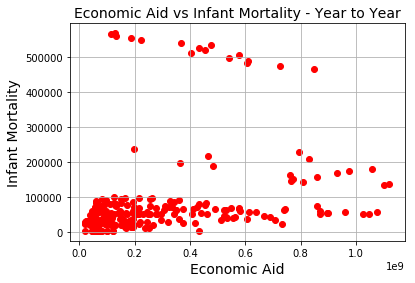

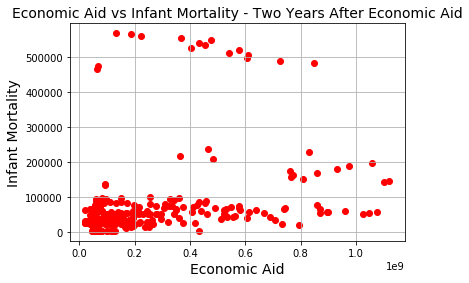

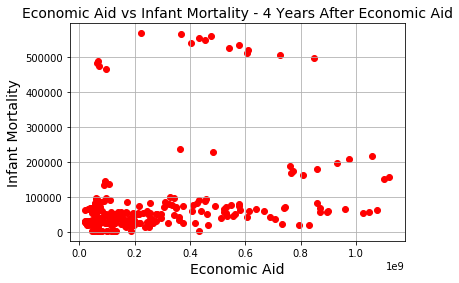

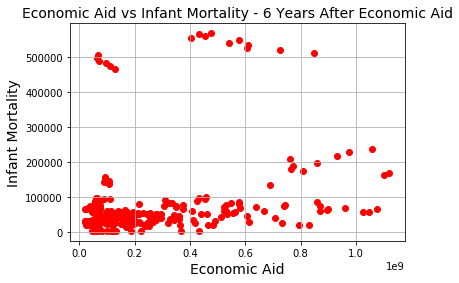

In [77]:

##Scatter Economic vs Infant Mortality for Year on Year 
plt.scatter(CombinedAid_InfantMortality['Economic'], 
            CombinedAid_InfantMortality['Infant Mortality'], color='red')
plt.title('Economic Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic Aid vs Infant Mortality (2 years after funding)
plt.scatter(CombinedAid_InfantMortality_2['Economic_2'], 
            CombinedAid_InfantMortality_2['Infant Mortality'], color='red')
plt.title('Economic Aid vs Infant Mortality - Two Years After Economic Aid', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic Aid vs. Infant Mortality (4 years after funding)
plt.scatter(CombinedAid_InfantMortality_4['Economic_4'], 
            CombinedAid_InfantMortality_4['Infant Mortality'], color='red')
plt.title('Economic Aid vs Infant Mortality - 4 Years After Economic Aid', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic Aid vs. Infant Morality (6 years after funding)
plt.scatter(CombinedAid_InfantMortality_6['Economic_6'], 
            CombinedAid_InfantMortality_6['Infant Mortality'], color='red')
plt.title('Economic Aid vs Infant Mortality - 6 Years After Economic Aid', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

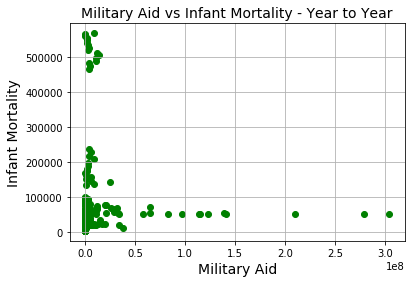

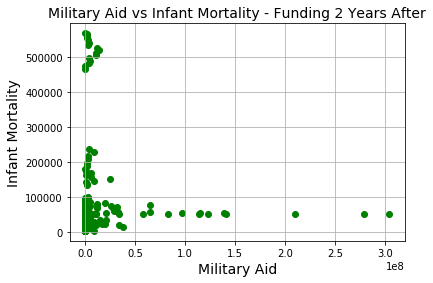

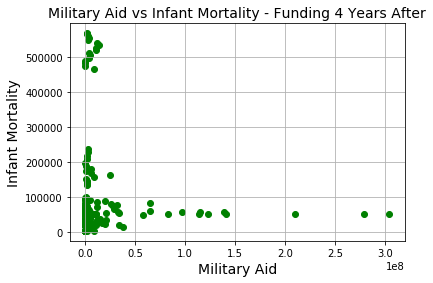

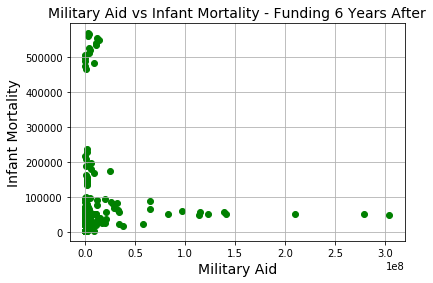

In [102]:
#Scatter Military vs Infant Mortality for funding on Year
plt.scatter(CombinedAid_InfantMortality['Military'], 
            CombinedAid_InfantMortality['Infant Mortality'], color='green')
plt.title('Military Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 2 years after
plt.scatter(CombinedAid_InfantMortality_2['Military_2'], 
            CombinedAid_InfantMortality_2['Infant Mortality'], color='green')
plt.title('Military Aid vs Infant Mortality - Funding 2 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 4 years after
plt.scatter(CombinedAid_InfantMortality_4['Military_4'], 
            CombinedAid_InfantMortality_4['Infant Mortality'], color='green')
plt.title('Military Aid vs Infant Mortality - Funding 4 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 6 years after
plt.scatter(CombinedAid_InfantMortality_6['Military_6'], 
            CombinedAid_InfantMortality_6['Infant Mortality'], color='green')
plt.title('Military Aid vs Infant Mortality - Funding 6 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()





In [84]:
# Begin regression with Ricardo's starter code
from sklearn import linear_model
X0 = CombinedAid_InfantMortality[['Economic', 'Military']] # here we have 2 variables 
#for multiple regression. If you just want to use one variable for simple linear regression, 
#then use X = df['Economic'] for example. Alternatively, you may add additional variables within the brackets
Y0 = CombinedAid_InfantMortality['Infant Mortality']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X0, Y0)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 41056.45646967007
Coefficients: 
 [ 0.0001439 -0.0002036]


In [82]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(X0) # adding a constant 
model = sm.OLS(Y0, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     31.53
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           4.66e-08
Time:                        13:52:23   Log-Likelihood:                -3750.3
No. Observations:                 288   AIC:                             7505.
Df Residuals:                     286   BIC:                             7512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.001e+04   8998.486      4.446      0.0

C:\Users\julia\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

